In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('seaborn')
# 더이상 유효하지 않음
sns.set(font_scale =2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Age에 결측치 발생
# 50%이상 형제/배우자 없이 탑승
# 50%이상 부모/자녀 없이 탑승
# 50%이상 3등석 탑승
# 50%이상 20대 이하

In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
# Age에 결측치 발생, Fare에 1개의 결측치 발생
# 50%이상 형제/배우자 없이 탑승
# 50%이상 부모/자녀 없이 탑승
# 50%이상 3등석 탑승
# 50%이상 20대 이하

In [8]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [9]:
# train 데이터의 결측치
# Cabin > Age > Embarked 순으로 결측치 존재

In [10]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


In [11]:
# test 데이터의 결측치
# Cabin > Age > Fare 순으로 결측치 존재

<Axes: >

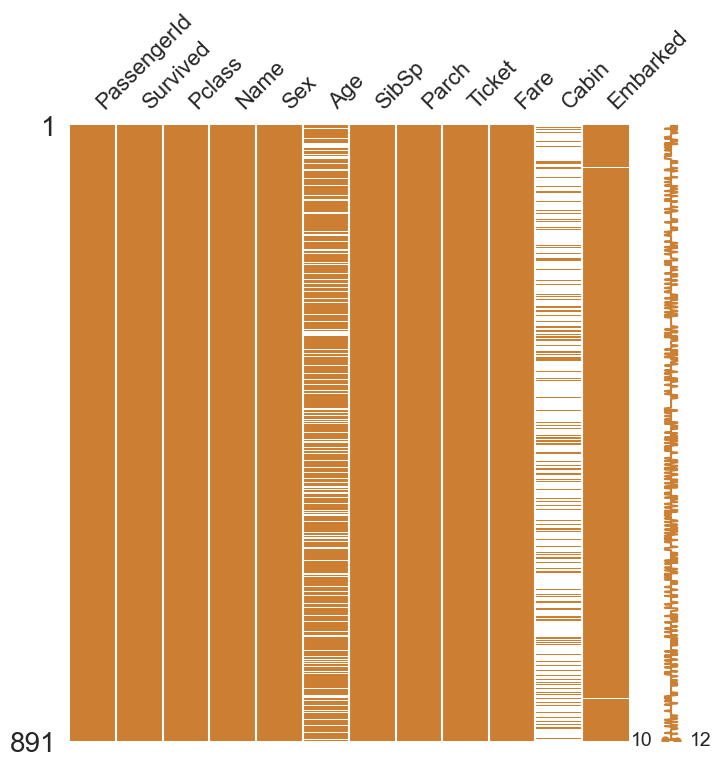

In [12]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color = (0.8,0.5,0.2))

In [13]:
# Passenger Id 순으로 볼 때 따로 결측치 패턴은 발생하지 않았다.
# (지난 멘토링) 시계열적인 요소가 없기 때문에 패턴이 존재하지 않음

<Axes: >

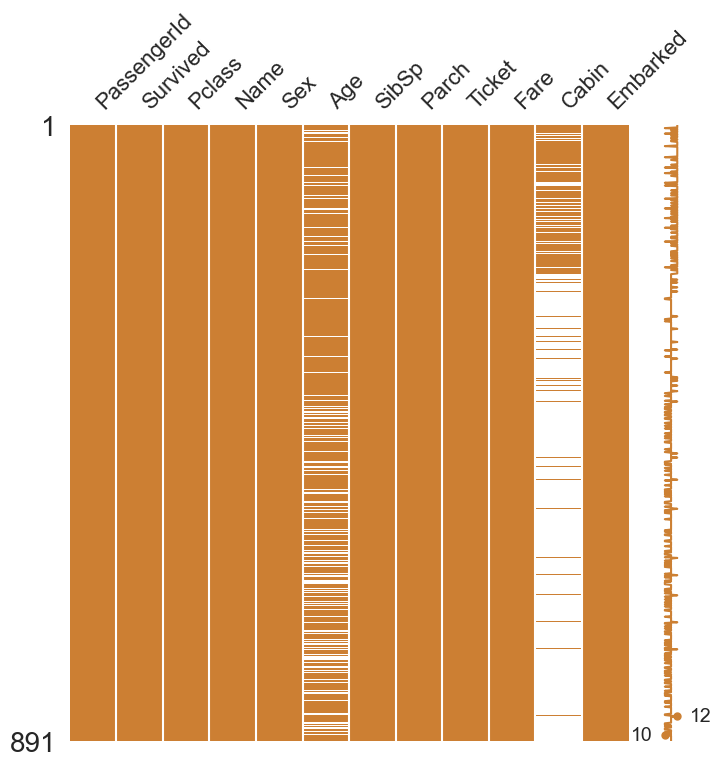

In [14]:
df_train_sorted = df_train.sort_values(by='Pclass', ascending=True)
msno.matrix(df=df_train_sorted, figsize=(8,8), color=(0.8,0.5,0.2))

In [15]:
# Pclass 기준으로 오름차순으로 정렬
# 낮은 객실 등급에서 Cabi(객실번호) 결측치가 많이 발생한 것을 알 수 있다.

<Axes: >

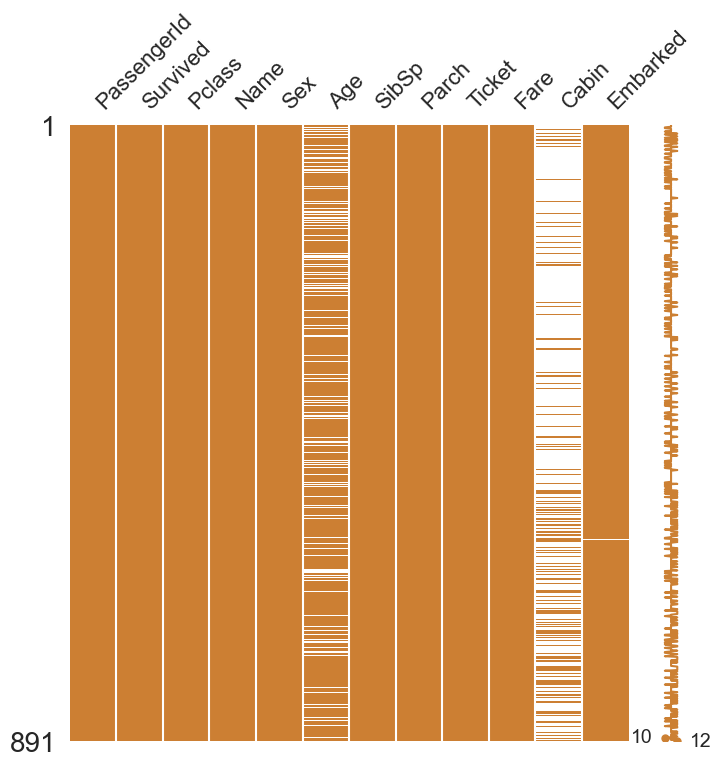

In [16]:
df_train_sorted_2 = df_train.sort_values(by='Survived', ascending=True)
msno.matrix(df=df_train_sorted_2, figsize=(8,8), color=(0.8,0.5,0.2))

In [17]:
# 생존 여부를 기준으로 오름차순 정렬을 하였으나 결측치 패턴이 뚜렷하지 않다. 

<Axes: >

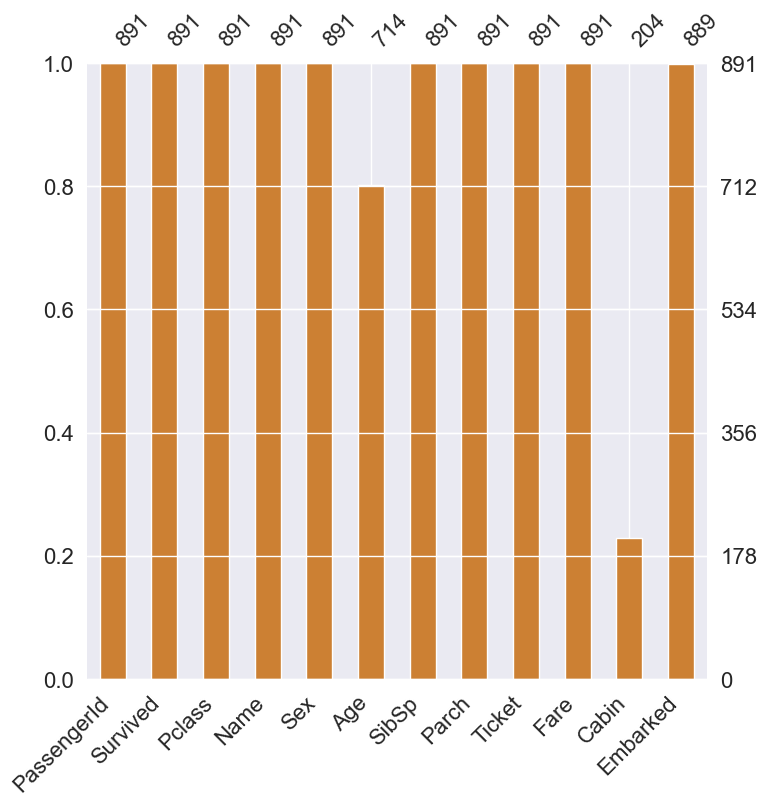

In [18]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

<Axes: >

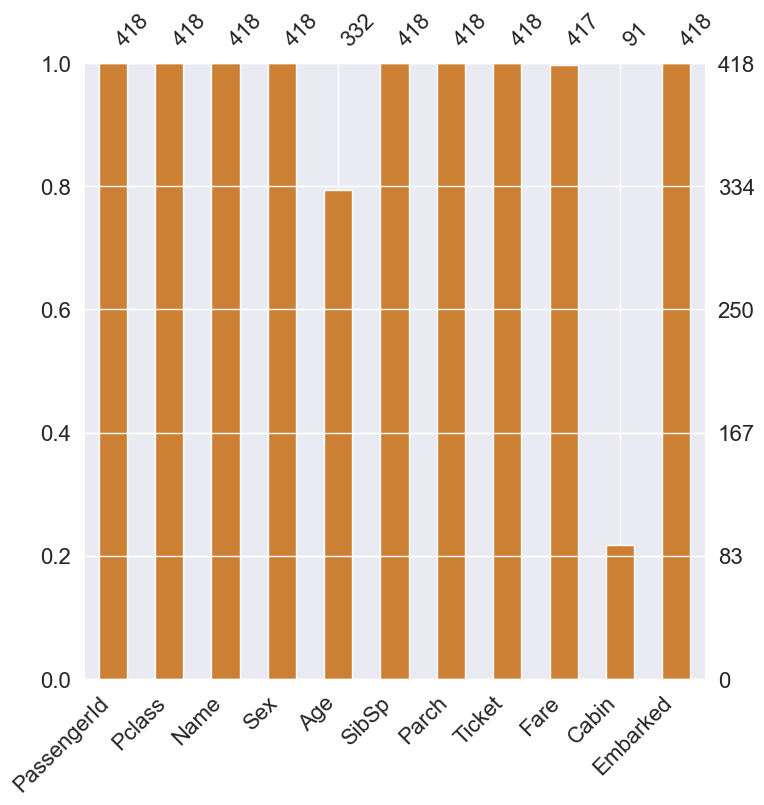

In [19]:
msno.bar(df=df_test.iloc[:,:],figsize = (8,8), color = (0.8,0.5,0.2))

In [20]:
# 두개의 데이터 모두 Cabin, Age 순으로 결측치 데이터가 뚜렷하게 존재한다.

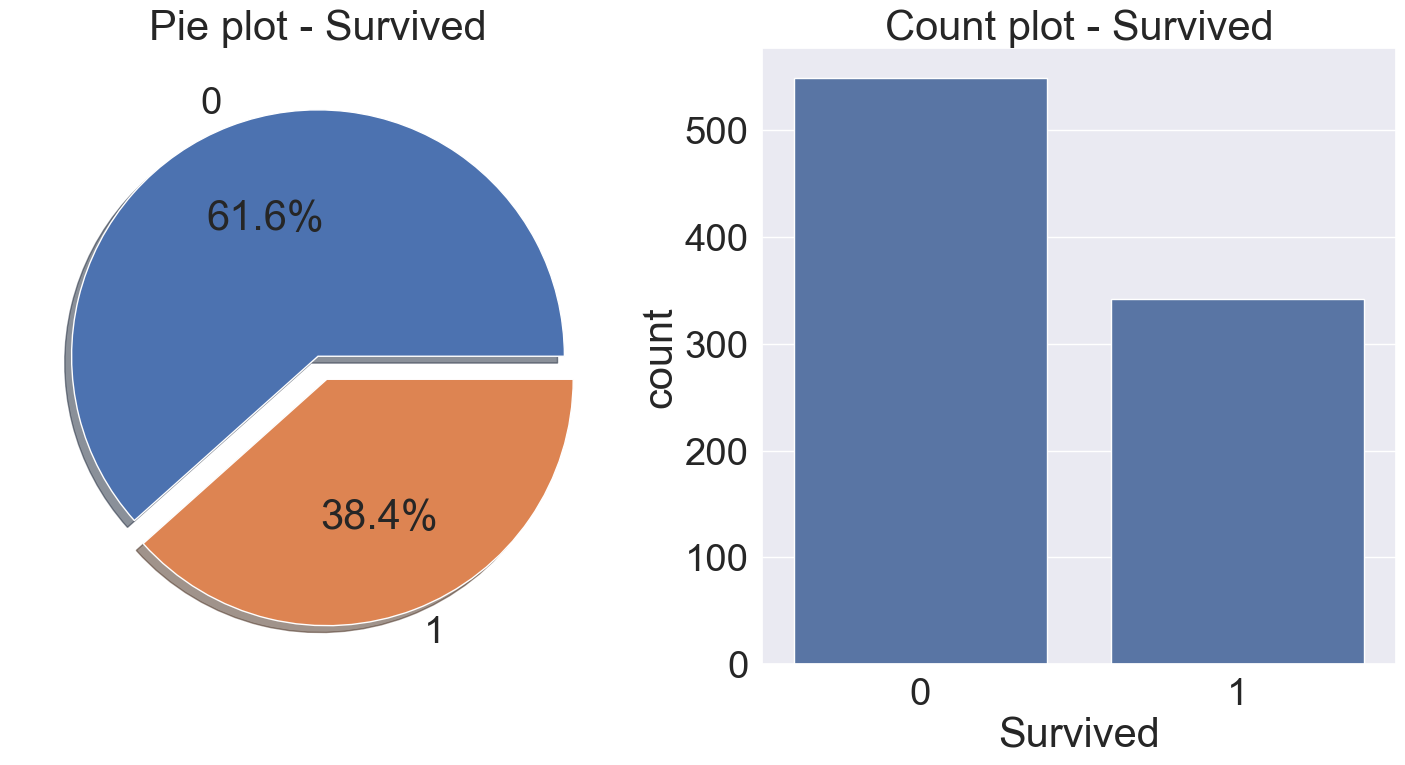

In [21]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax = ax[0], shadow =True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

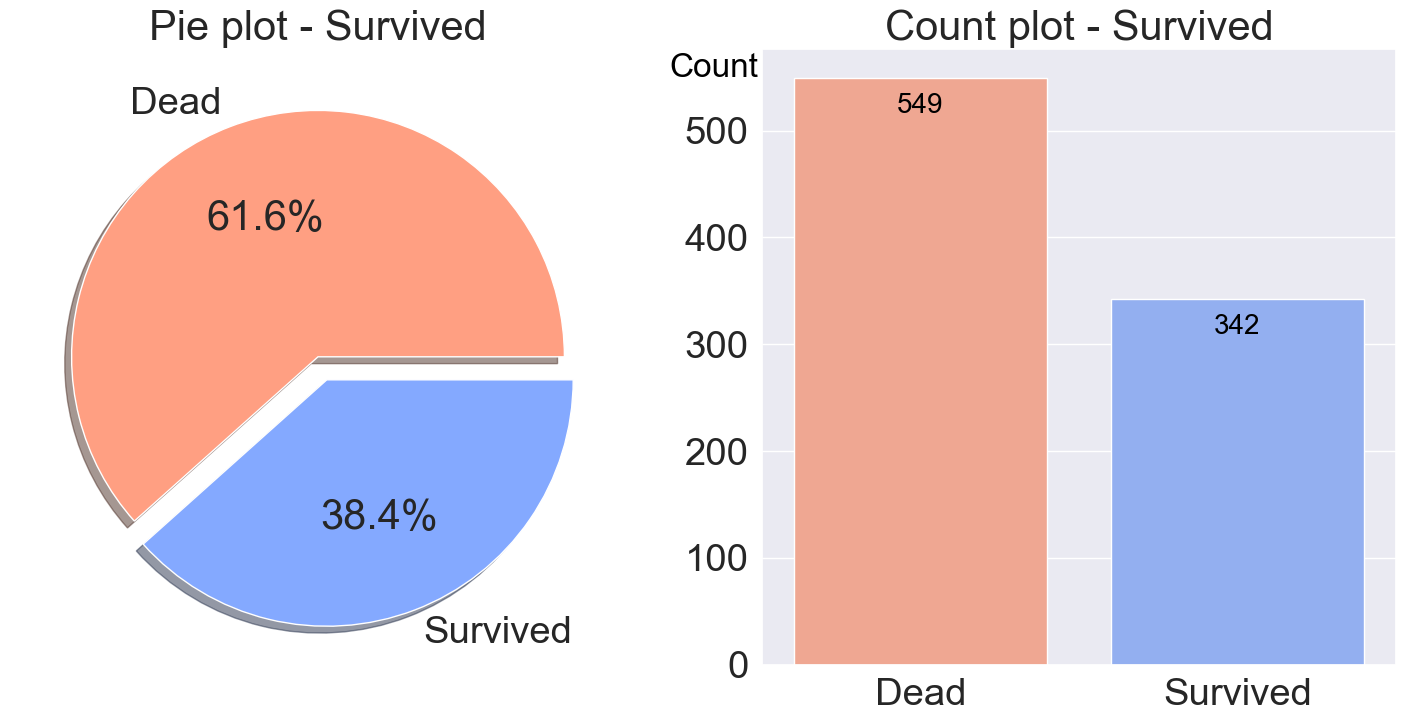

In [78]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

#label 을 Dead, Survived로 수정 (한눈에 파악가능)
#count plot과 색상일치를 위해 색상 수정
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], labels = ['Dead','Survived'], colors=['#FF9F82','#84A9FF'], autopct='%1.1f%%', ax = ax[0], shadow =True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

#pie plot과 색상 일치
sns.countplot(x='Survived',data = df_train,palette=['#FF9F82','#84A9FF'], ax=ax[1])
# 막대그래프 높이 측정하여 갯수 추가
for p in ax[1].patches:
    ax[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, -20),
                textcoords='offset points')
# pie plot과 동일하게 x 축 틱레이블 수정
plt.xticks(ticks=[0, 1], labels=['Dead', 'Survived'])

ax[1].set_title('Count plot - Survived')
ax[1].set_xlabel('')

# count가 잘보이게 기존 ylabel 삭제
ax[1].set_ylabel('')
# 새로운 텍스트 (Count) 추가
ax[1].text(-0.65, 550, 'Count', color='black', fontsize=24, ha='center')
plt.show()

In [14]:
#클래스별 전체 승객 수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
#클래스별 생존자 수
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [ ]:
# 1등급 객실의 경우 생존자의 비율이 높다
# 3등급 객실의 경우 사망자의 비율이 높다

<Axes: xlabel='Pclass'>

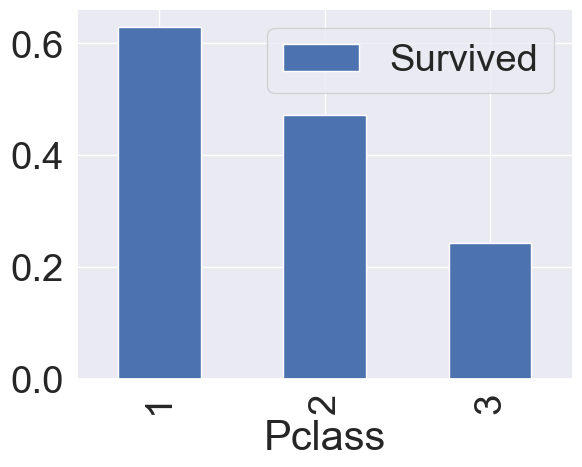

In [88]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

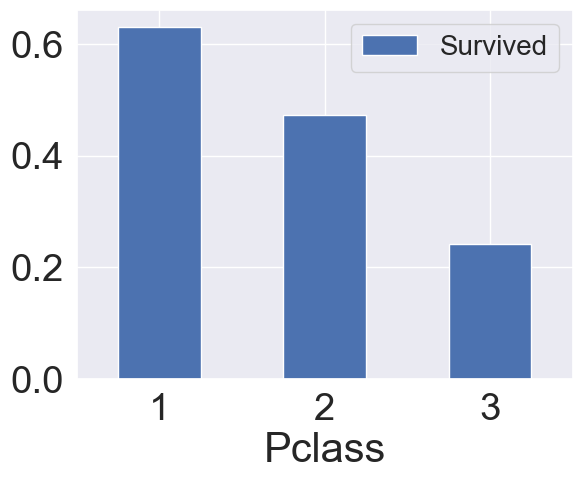

In [89]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
# x축 틱레이블 세우기
plt.xticks(rotation=0)
#범례 폰트사이즈 줄이기
plt.legend(fontsize=20)
#y축의 최댓값을 1로 표현하기
# plt.ylim(0,1)
# 3등급 객실의 생존도가 낮은 것은 보이나, 1등급 객실과 차이가 많이 난다는 것은 눈에 띄지 않아서 수정하지 않는 것으로 변경 
plt.show()

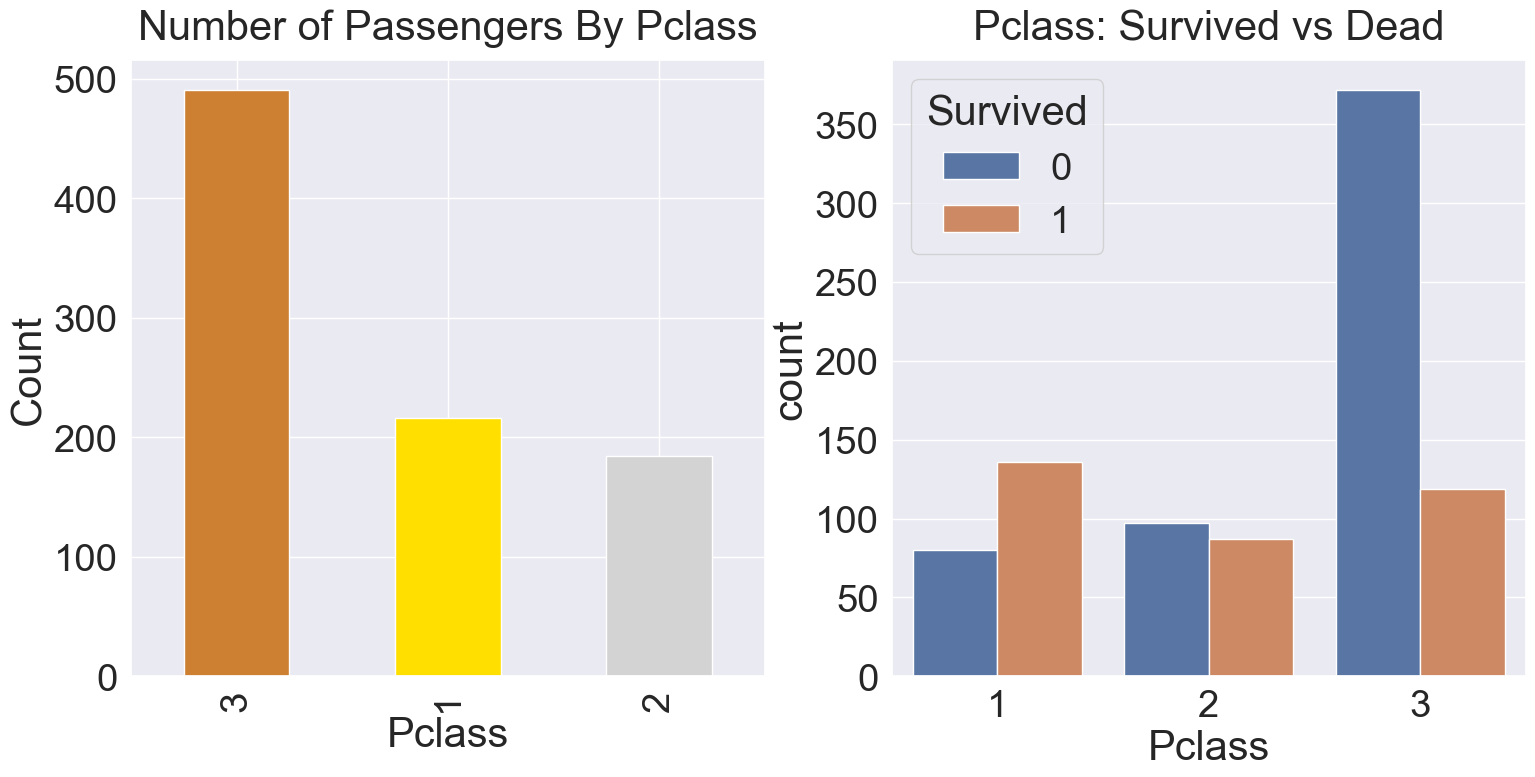

In [90]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue = 'Survived', data= df_train, ax= ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

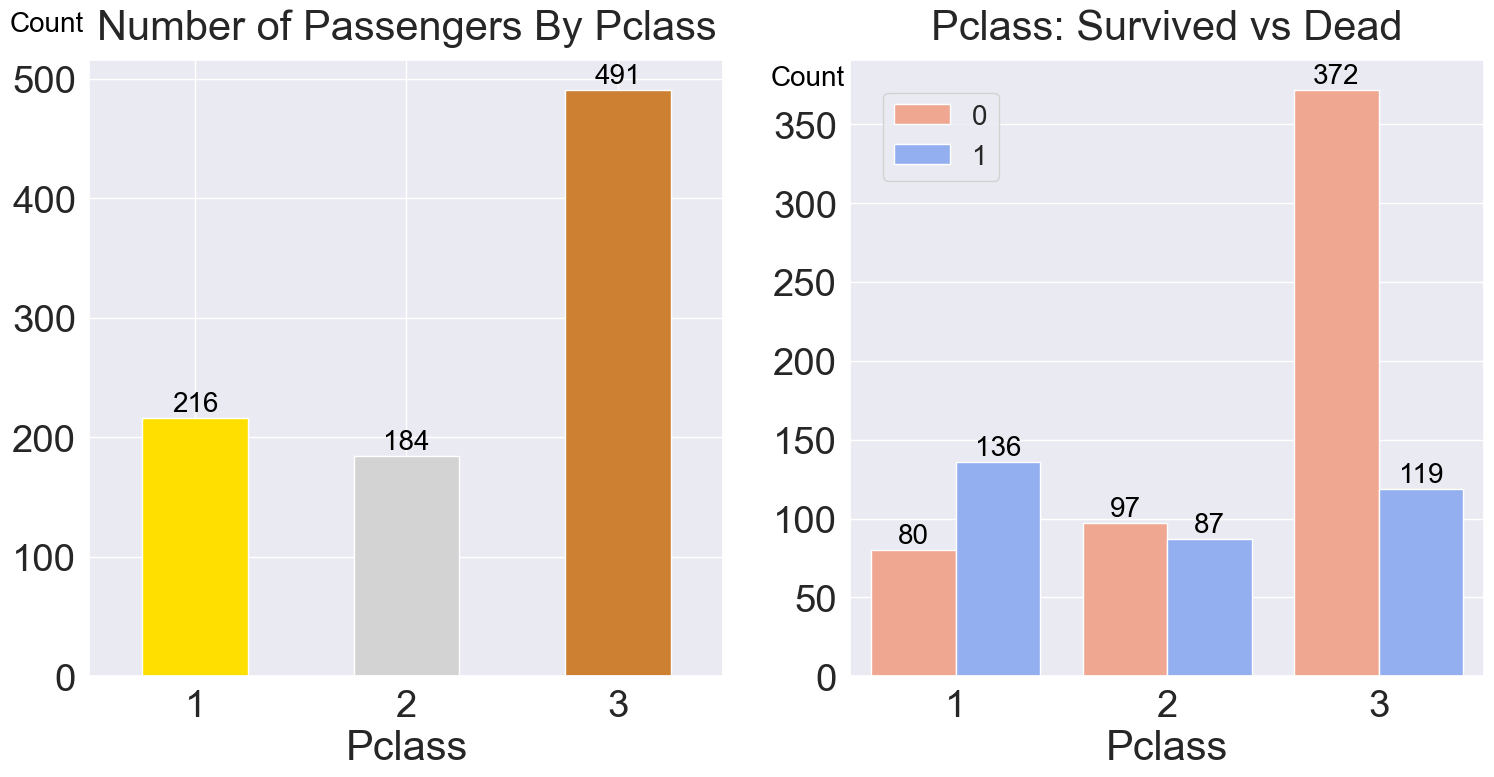

In [138]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18,8))
#크기 순이 아닌 인덱스 기준으로 정렬 : sort_index()
df_train['Pclass'].value_counts().sort_index().plot.bar(color=['#FFDF00', '#D3D3D3','#CD7F32'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
#x틱레이블 숫자 돌리기
plt.setp(ax[0].get_xticklabels(), rotation=0)
# 새로운 텍스트 (Count) 추가
ax[0].text(-0.7, 540, 'Count', color='black', fontsize=20, ha='center')
# 막대그래프 숫자 넣기
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, 10),
                textcoords='offset points')


sns.countplot(x='Pclass', hue = 'Survived', data= df_train, ax= ax[1], palette=['#FF9F82','#84A9FF'])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
ax[1].set_ylabel('')
# Count 텍스트 추가
ax[1].text(-0.7, 375, 'Count', color='black', fontsize=20, ha='center')
# 막대그래프 숫자 추가
for p in ax[1].patches:
    if p.get_height() > 0:
       ax[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=20, color='black', xytext=(0, 10),
                textcoords='offset points')
# 범례 크기 및 위치 조정
ax[1].legend(loc='upper left',bbox_to_anchor = (0.03,0.97), fontsize=20)
plt.show()

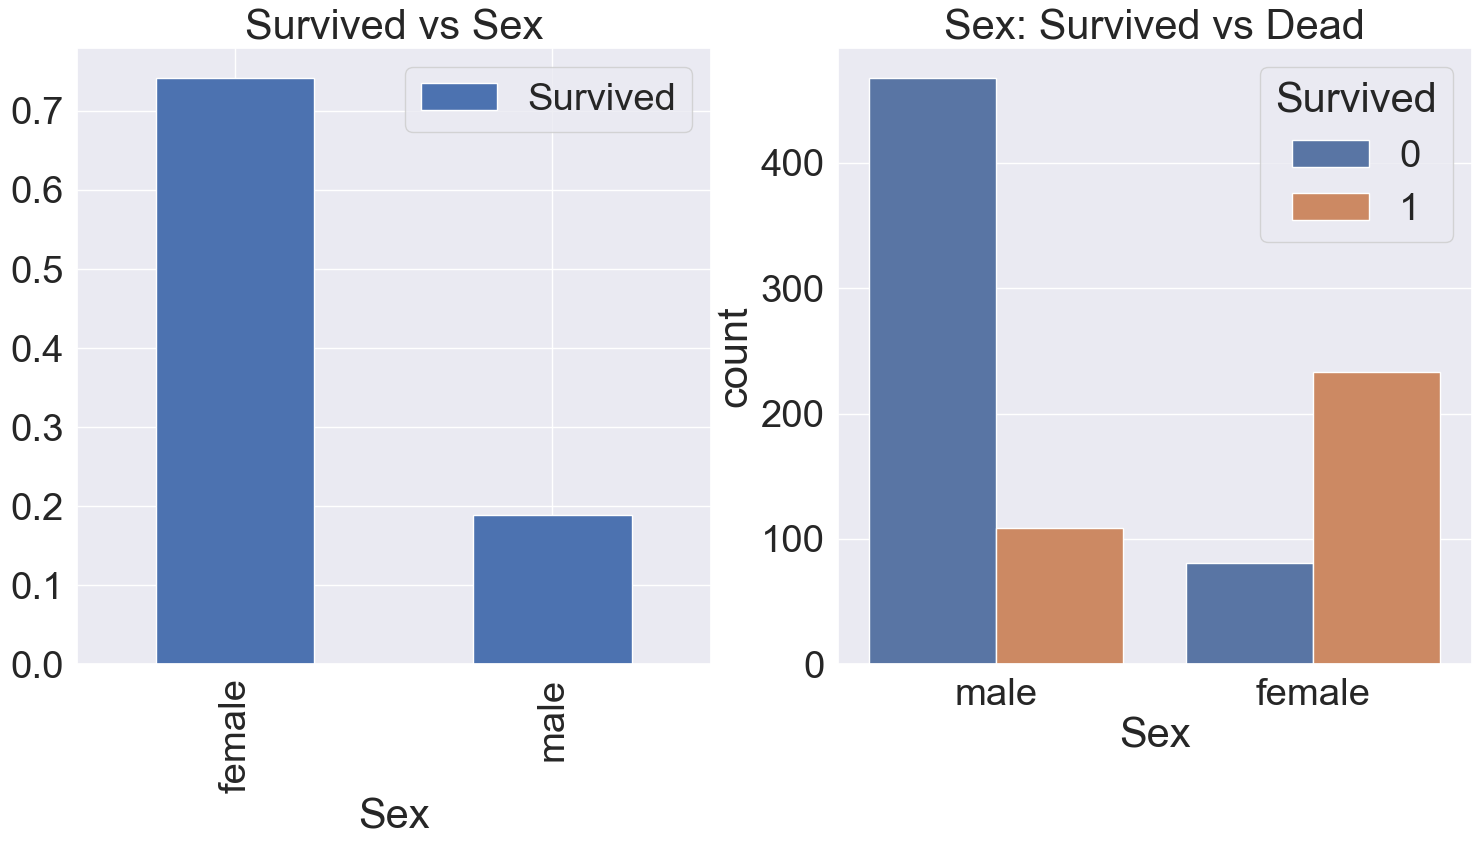

In [141]:
f, ax = plt.subplots(1,2, figsize= (18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

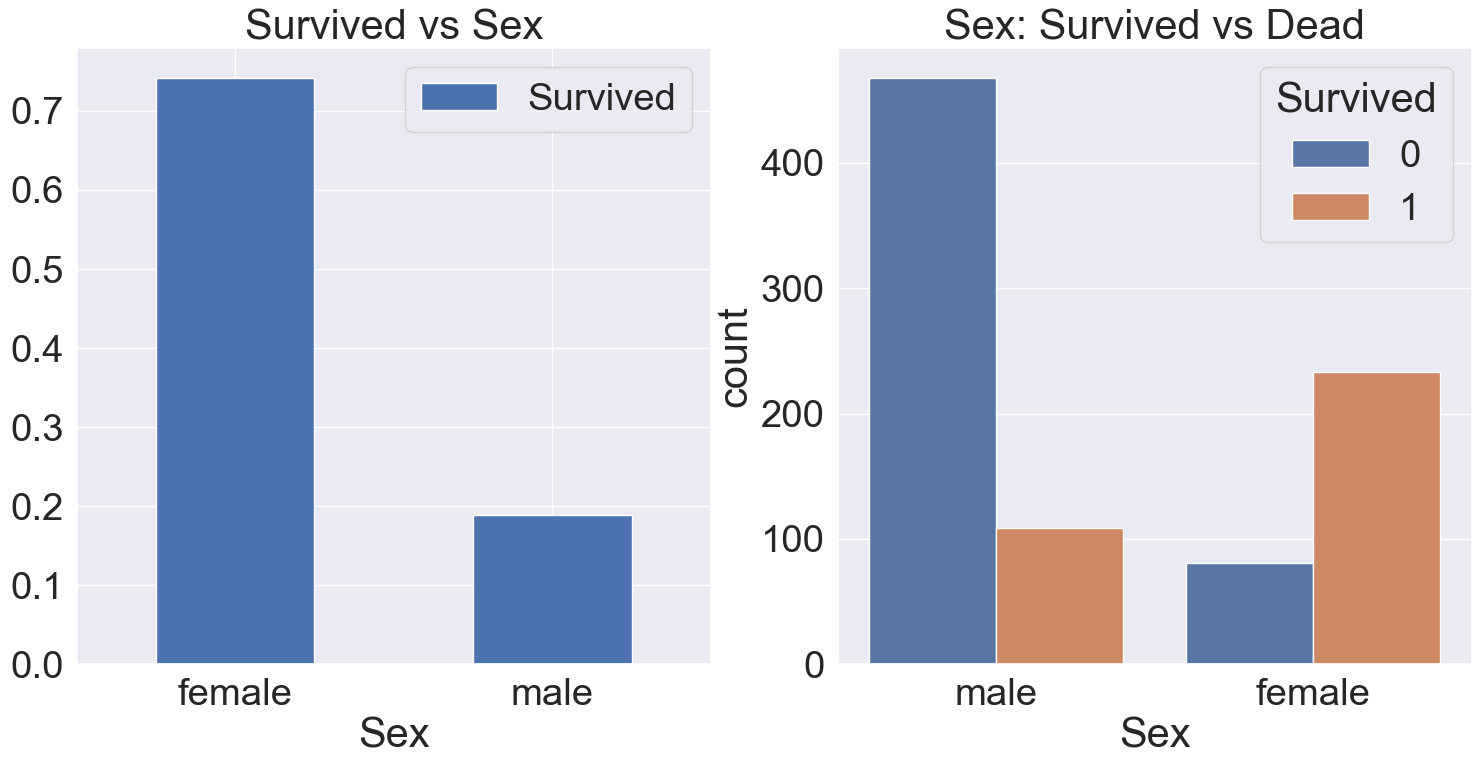

[None, None]

In [143]:
f, ax = plt.subplots(1,2, figsize= (18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
plt.setp(ax[0].get_xticklabels(), rotation=0)
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

plt.setp(ax[0].get_xticklabels(), rotation=0)

In [20]:
df_train[['Sex', 'Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
# 여성의 생존율이 더 높다

In [21]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


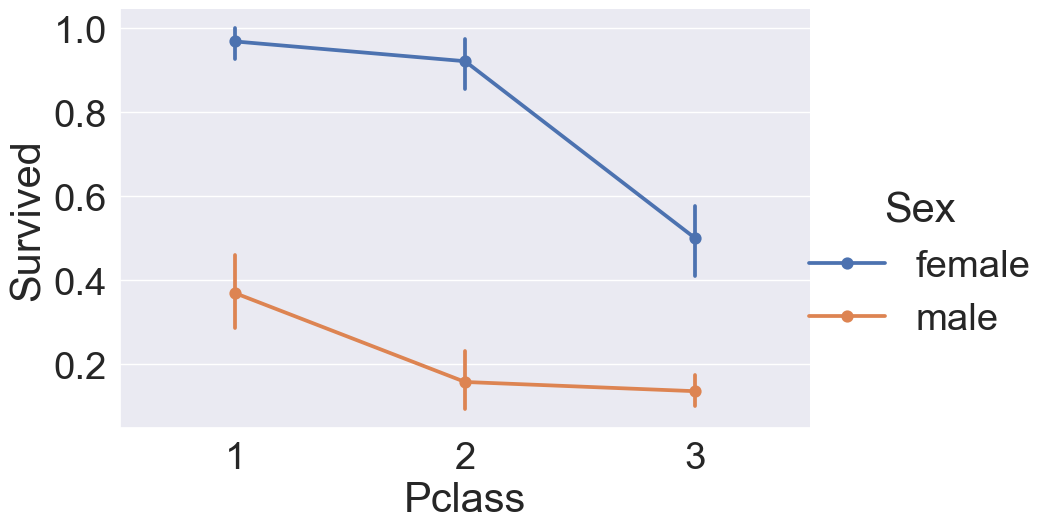

In [22]:
# sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size= 6, aspect=1.5)
# factorplot 대신 catplot을 사용합니다.

sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', height=6, aspect=1.5)


In [ ]:
# 1등급객실의 여성의 생존율이 가장 높다
# 여성의 생존율이 남성보다 압도적으로 높다
# 모든 등급에서 생존율에서 성별의 차이가 난다.
# 객실 등급이 낮아질 수록 생존율 또한 낮아진다.

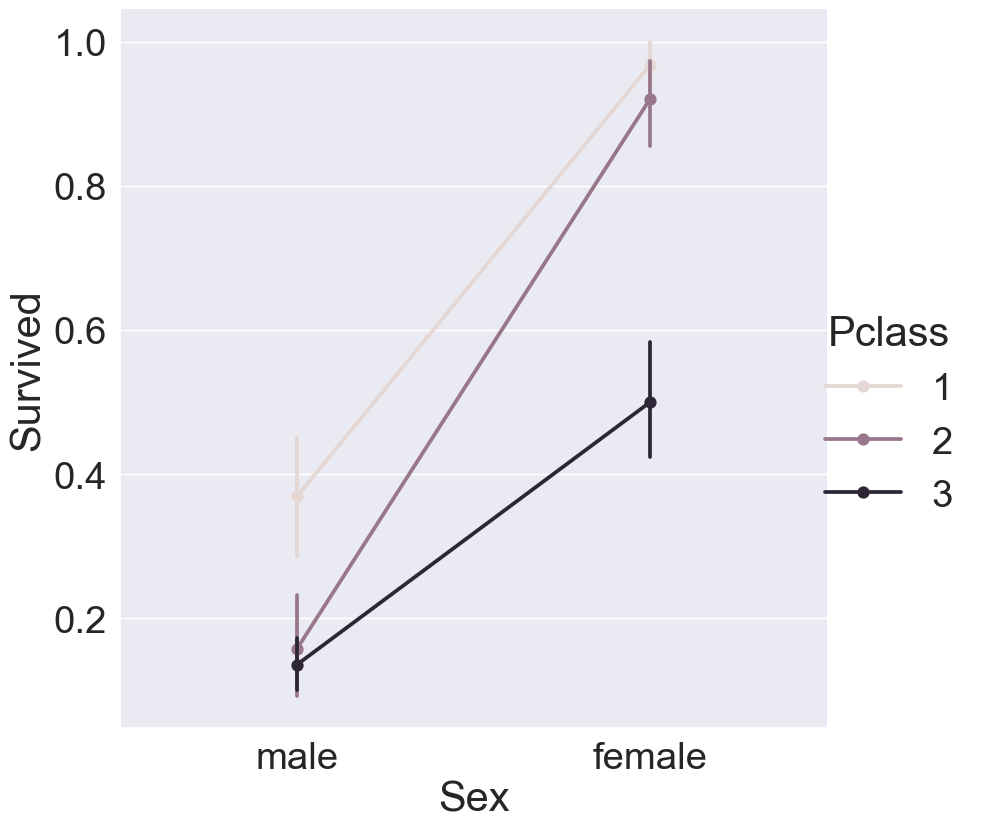

In [23]:
sns.catplot(x='Sex', y='Survived', hue='Pclass', data=df_train, kind='point', saturation=0.5, height=9, aspect=1)

In [ ]:
# 남성의 생존율이 낮고 여성의 생존율이 높지만 이 차이는 객실 등급이 높을 수록 극명하게 나타난다.
# 3등급 객실의 성별에 따른 생존율의 기울기는 완만한 편이고, 1,2등급 객실의 기울기는 가파르다.

In [24]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


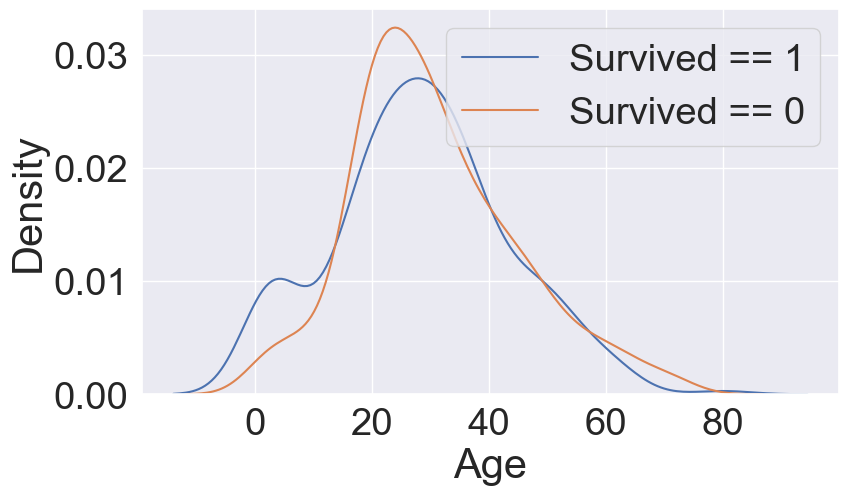

In [145]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

In [ ]:
# 사망자 그래프의 첨도가 더 크다. (밀집되어있다.)

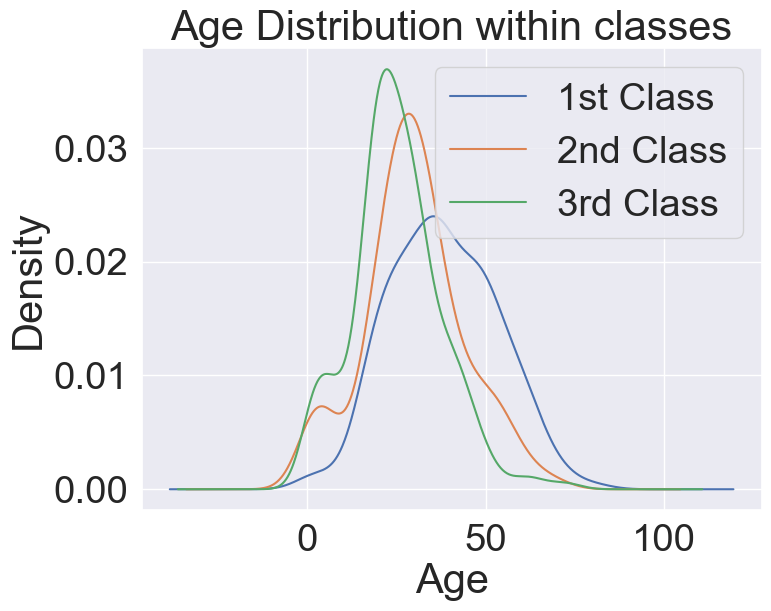

In [26]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

In [ ]:
# 1,2 등급 객실의 경우 부모와 함께 탄 어린아이들이 있다.
# 3등급 객실의 중앙값은 1,2등급 객실의 중앙값 보다 높다.

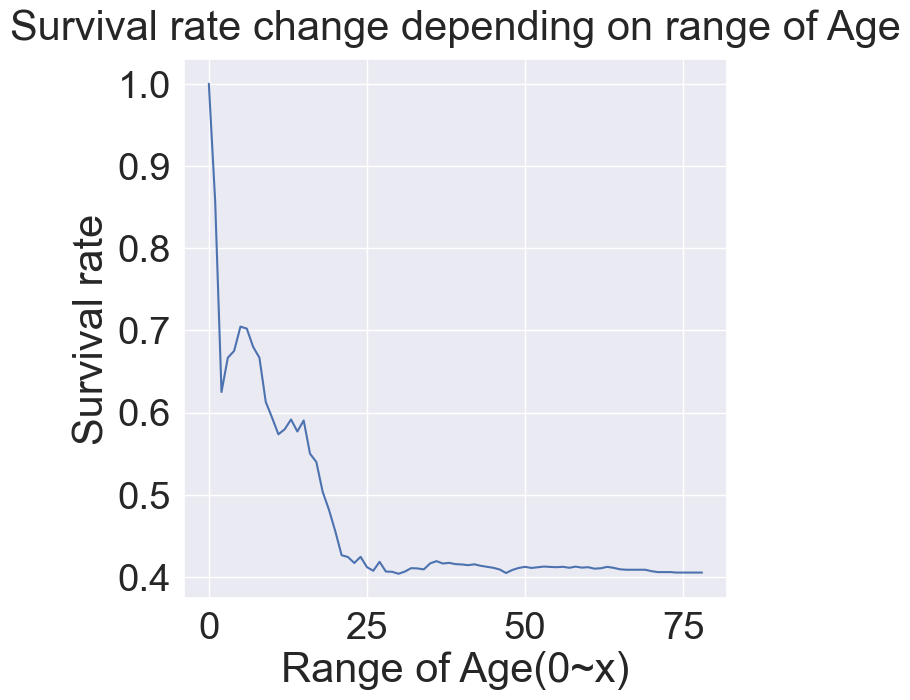

In [27]:
cummulate_survival_ratio = []
for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [ ]:
# 유아, 영아 순으로 생존율이 높고, 그 후로 가파르게 떨어진다.

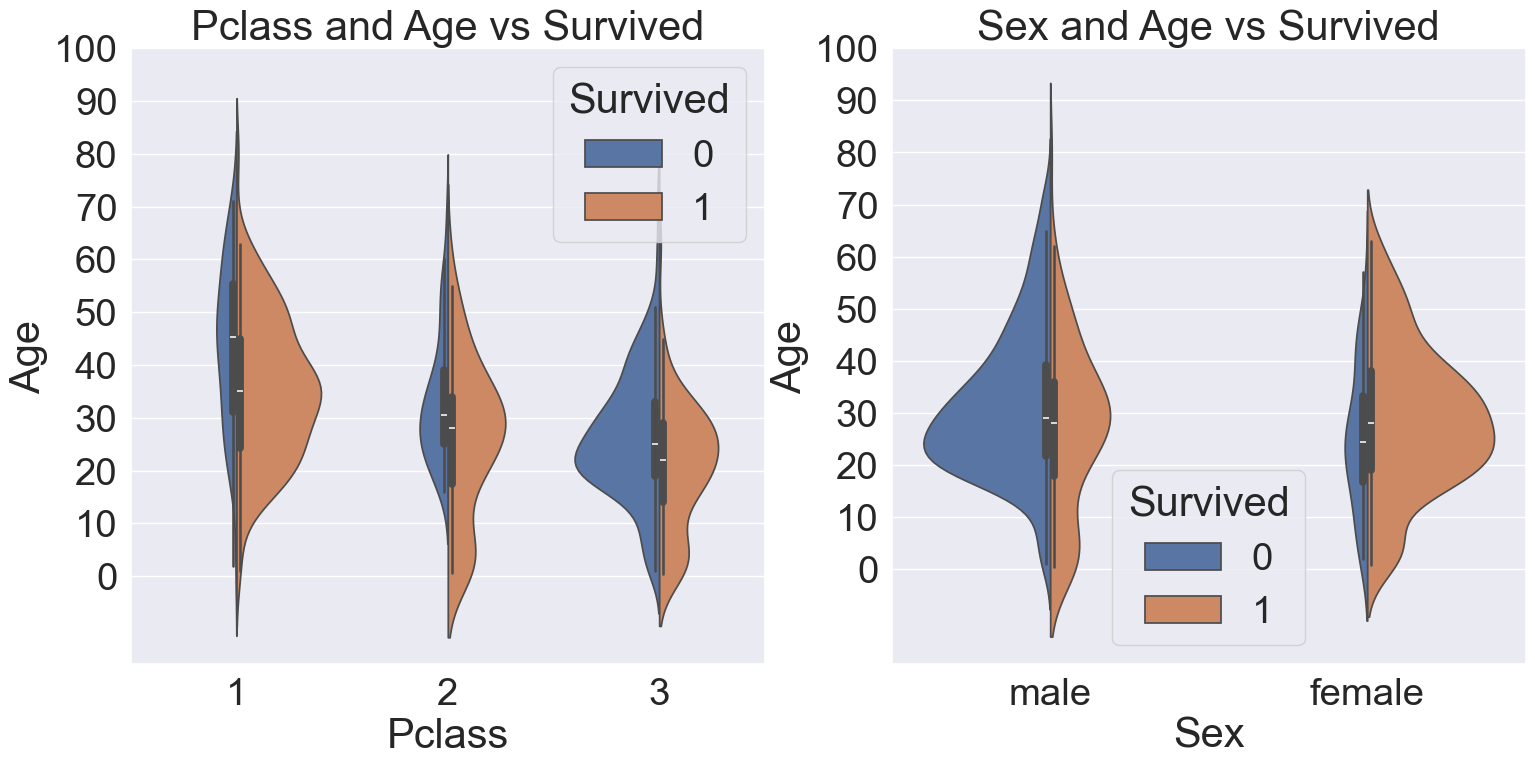

In [28]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


In [ ]:
# 1,2,3 등급 객실 모두 나이에 따른 생존 변화는 극명한 차이를 보이지 않는다
# 다만 유아의 경우 생존율이 높지만, 3등급 객실은 차이가 없다고 볼 수 있다.
# 남성의 경우 20~30대의 사망이 가장 많다. 10세 이하의 경우 성별 상관없이 생존을 많이하는 것을 볼 수 있다.

<Axes: xlabel='Embarked'>

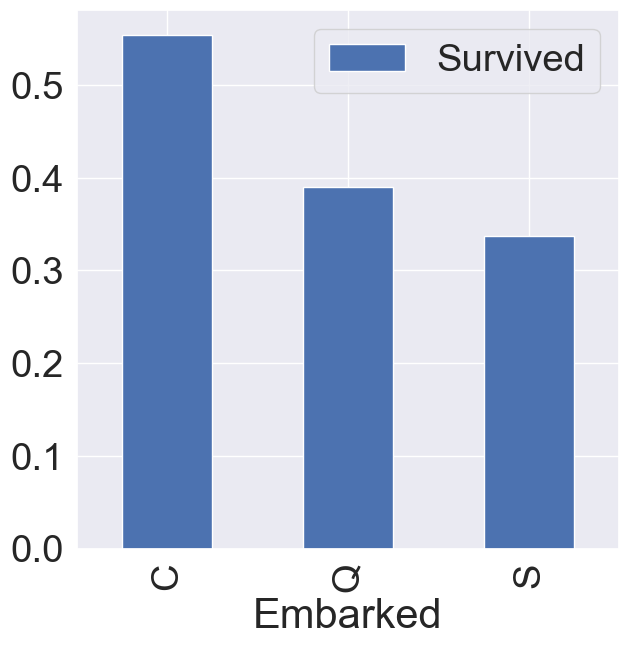

In [29]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by='Survived', ascending =False).plot.bar(ax=ax)

In [ ]:
# C = Cherbourg, Q = Queenstown, S = Southampton
# 선착장 탑승에 따른 생존율 차이도 보인다.

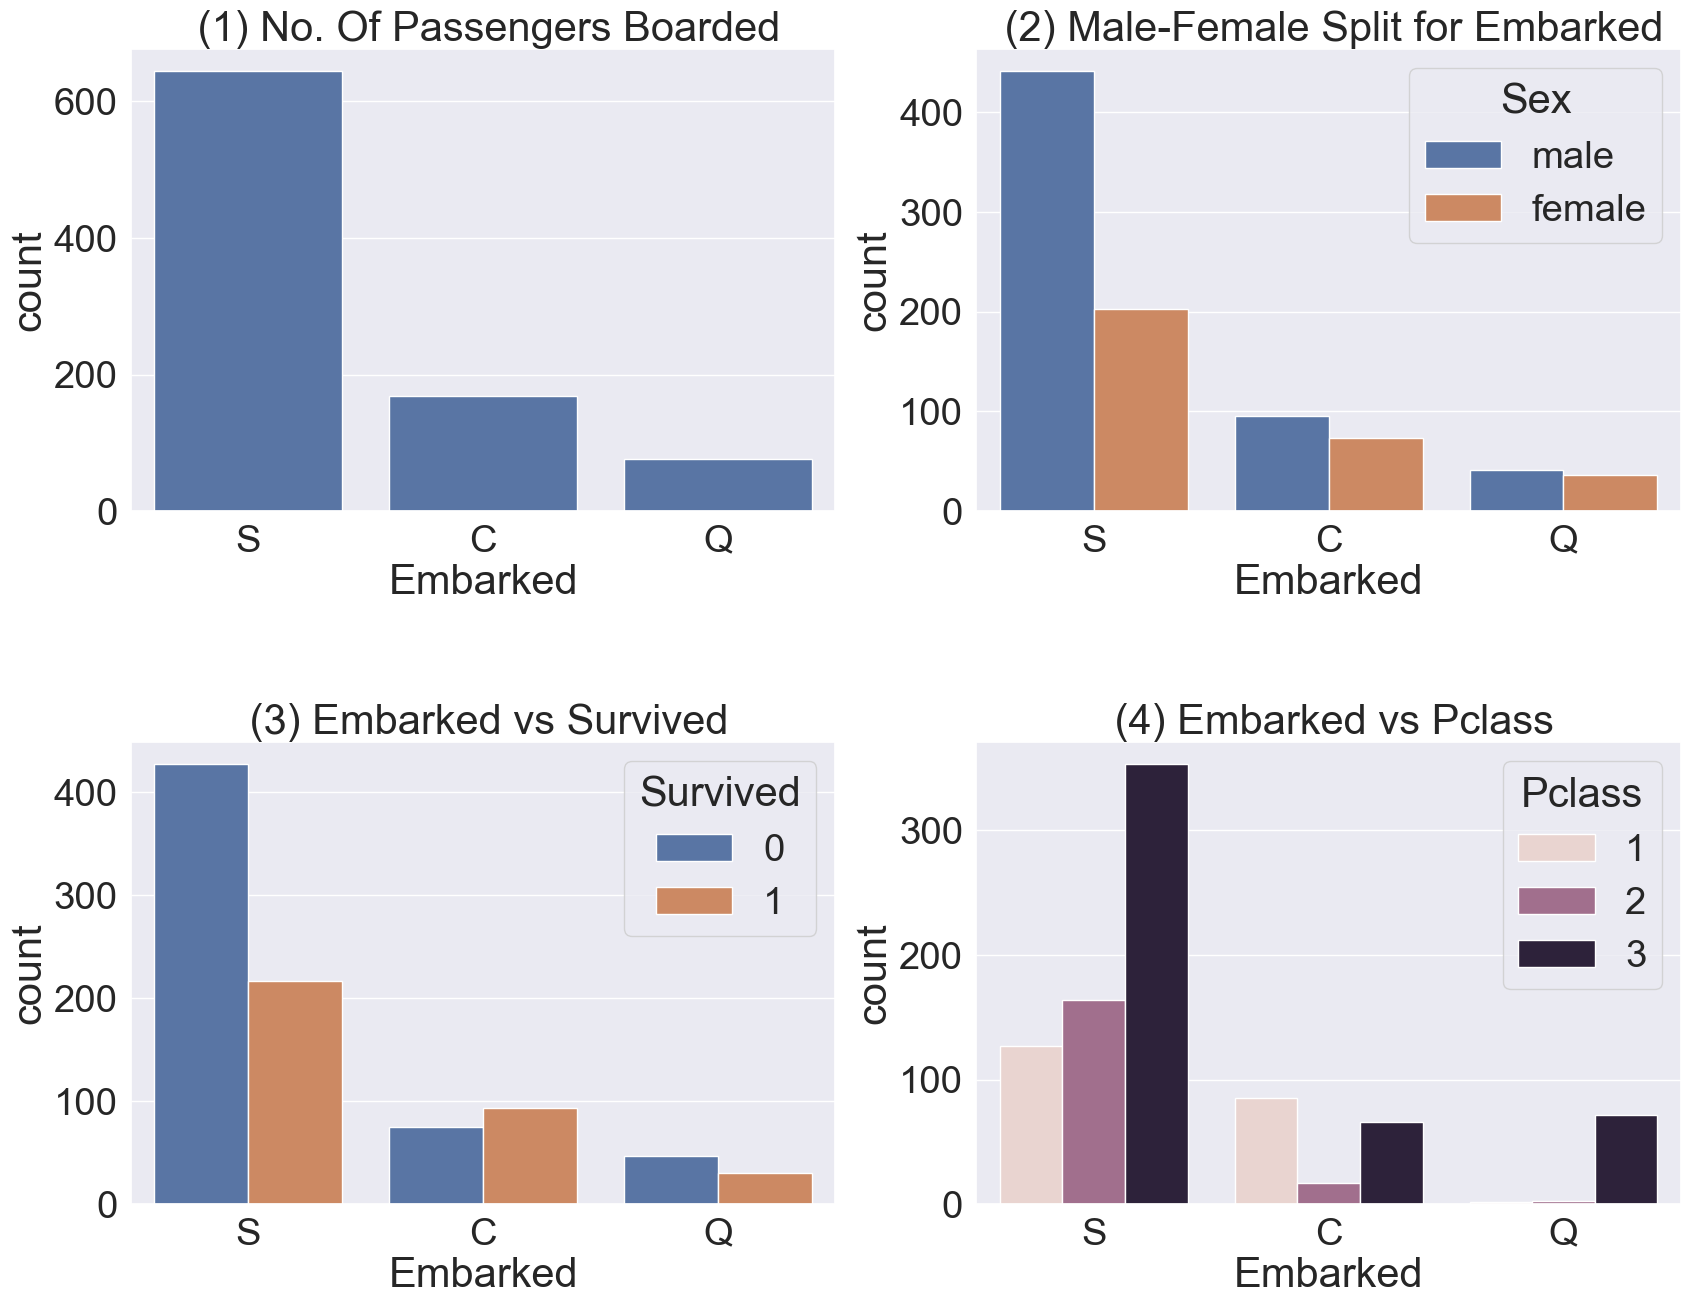

In [30]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot(x= 'Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title(' (1) No. Of Passengers Boarded')
sns.countplot( x= 'Embarked', hue='Sex', data=df_train, ax = ax[0,1])
ax[0,1].set_title(' (2) Male-Female Split for Embarked')
sns.countplot(x = 'Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title(' (3) Embarked vs Survived')
sns.countplot(x = 'Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title(' (4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
#S 선착장에서 3등급 객실의 비율과 남성의 비율이 매우 높기 때문에 생존율에서 차이가 나는 것으로 보인다.

In [31]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [ ]:
# 형제배우자 + 부모자녀 + 본인 (1)

In [32]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11.0
Minimum size of Family:  1.0


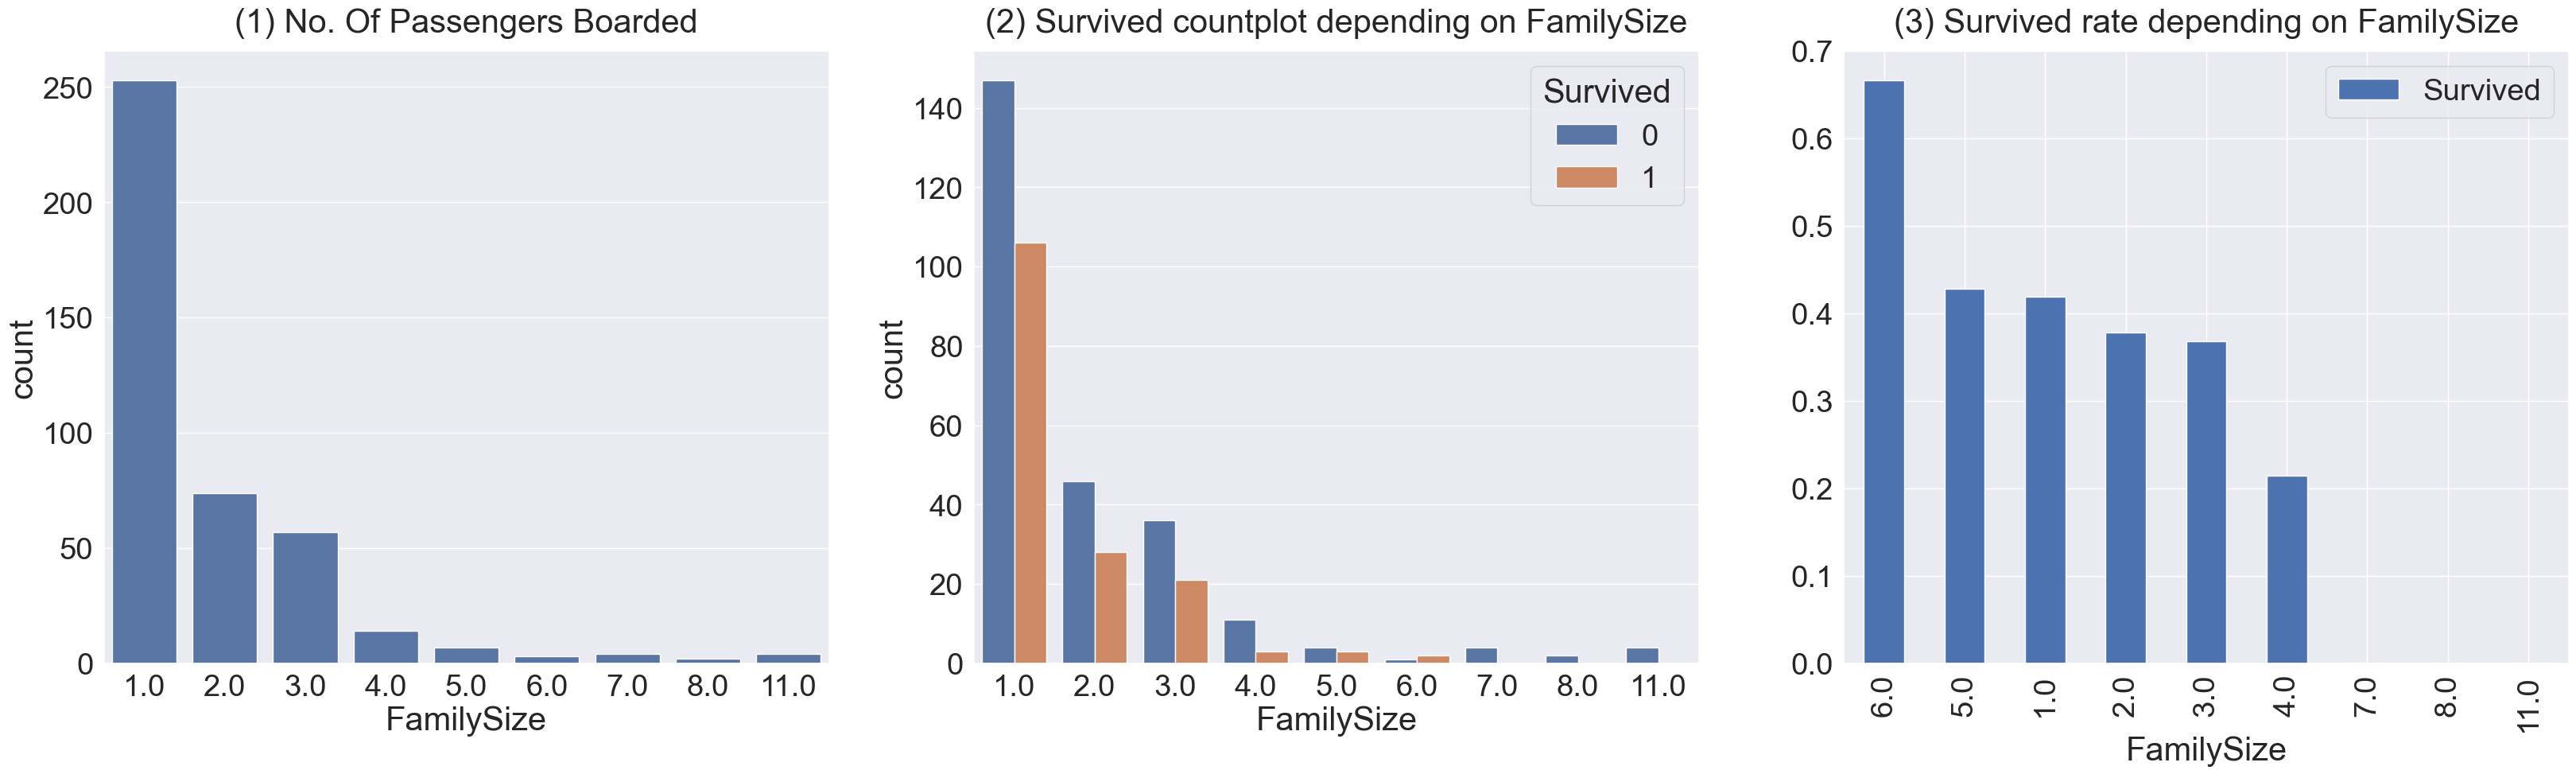

In [33]:
f, ax = plt.subplots(1,3, figsize=(40,10))
sns.countplot(x ='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)
sns.countplot(x = 'FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# 혼자 탄 승객의 비율이 매우높다.
# 유의미한 생존율의 차이는 없어보인다.
# 6명의 가족의 경우 생존율이 높지만 수가 매우 적다.
# 7명 이상의 가구는 생존율이 0명인 것을 보아 이동하기가 힘들어 생존할 확률이 낮았던 것으로 보인다. 

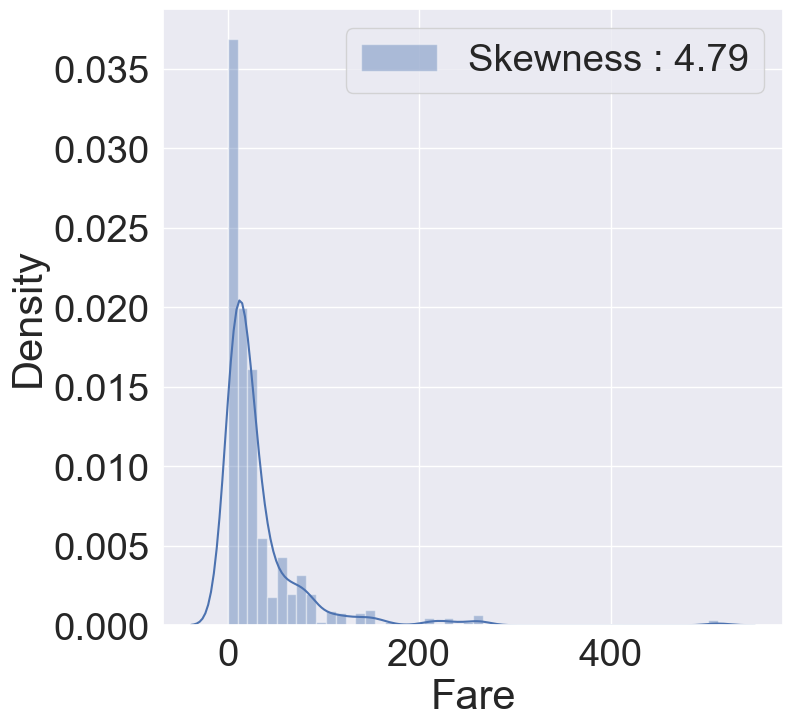

In [34]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [35]:
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0 )

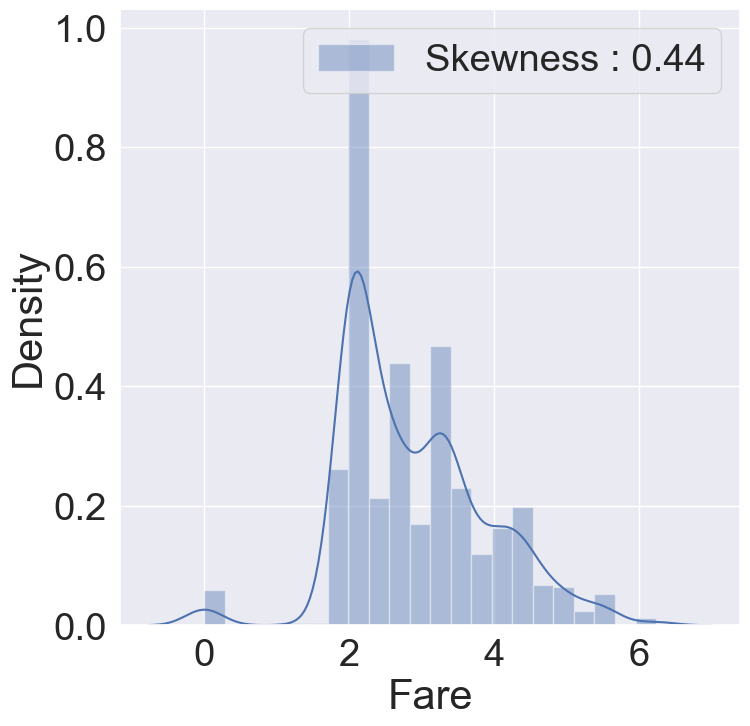

In [36]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc = 'best')

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,3.0


In [38]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [39]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#plt.sytle.use('seaborn')
sns.set(font_scale=2.5)

In [41]:
import plotly.offline as py
py.init_notebook_mode(connected= True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [42]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [43]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [44]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'], ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Ohter','Other','Other','Mr','Mr','Mr','Mr'], inplace=True)

In [45]:
df_train.groupby('Initial')[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare','FamilySize']].mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<Axes: xlabel='Initial'>

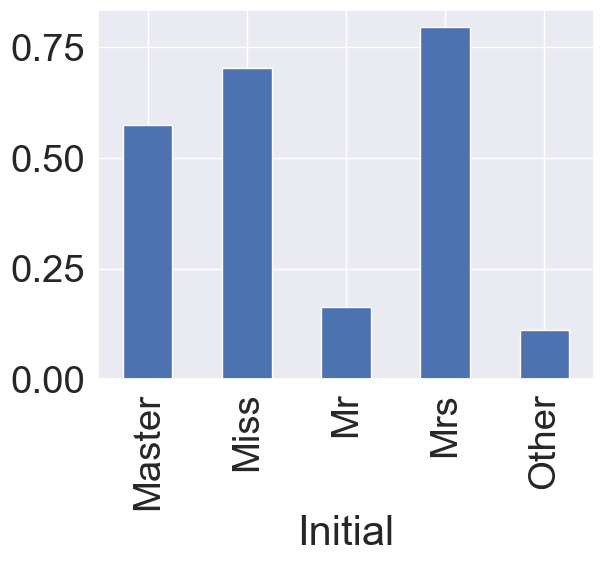

In [46]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [47]:
df_train.groupby('Initial')[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare','FamilySize']].mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [48]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [ ]:
# 나이 결측치에 평균치를 넣어준다.

In [49]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')


Embarked has  2  Null values


In [50]:
df_train['Embarked'].fillna('S', inplace = True)

In [ ]:
# 승선한 선착장 결측치에 가장 많이 타는 'S'를 넣어준다.

In [51]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [52]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [53]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  True


In [54]:
df_train.drop(['Age', 'Age_cat_2'], axis =1, inplace = True)
df_test.drop(['Age'], axis=1, inplace = True)

In [ ]:
# 나이를 카테고리화 하여 기존 나이 칼럼은 drop 시킨다.

In [55]:
df_train['Initial'] = df_train['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})
df_test['Initial'] = df_test['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4 })

In [ ]:
# 호칭 또한 범주화 시킨다.

In [56]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [57]:
df_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [58]:
df_train['Embarked'] = df_train['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})
df_test['Embarked'] = df_test['Embarked'].map({'C' : 0, 'Q' : 1, 'S' :2})

In [59]:
df_train['Embarked'].isnull().any()

False

In [60]:
df_train['Sex'] = df_train['Sex'].map({'female' :0, 'male' : 1 })
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1 })

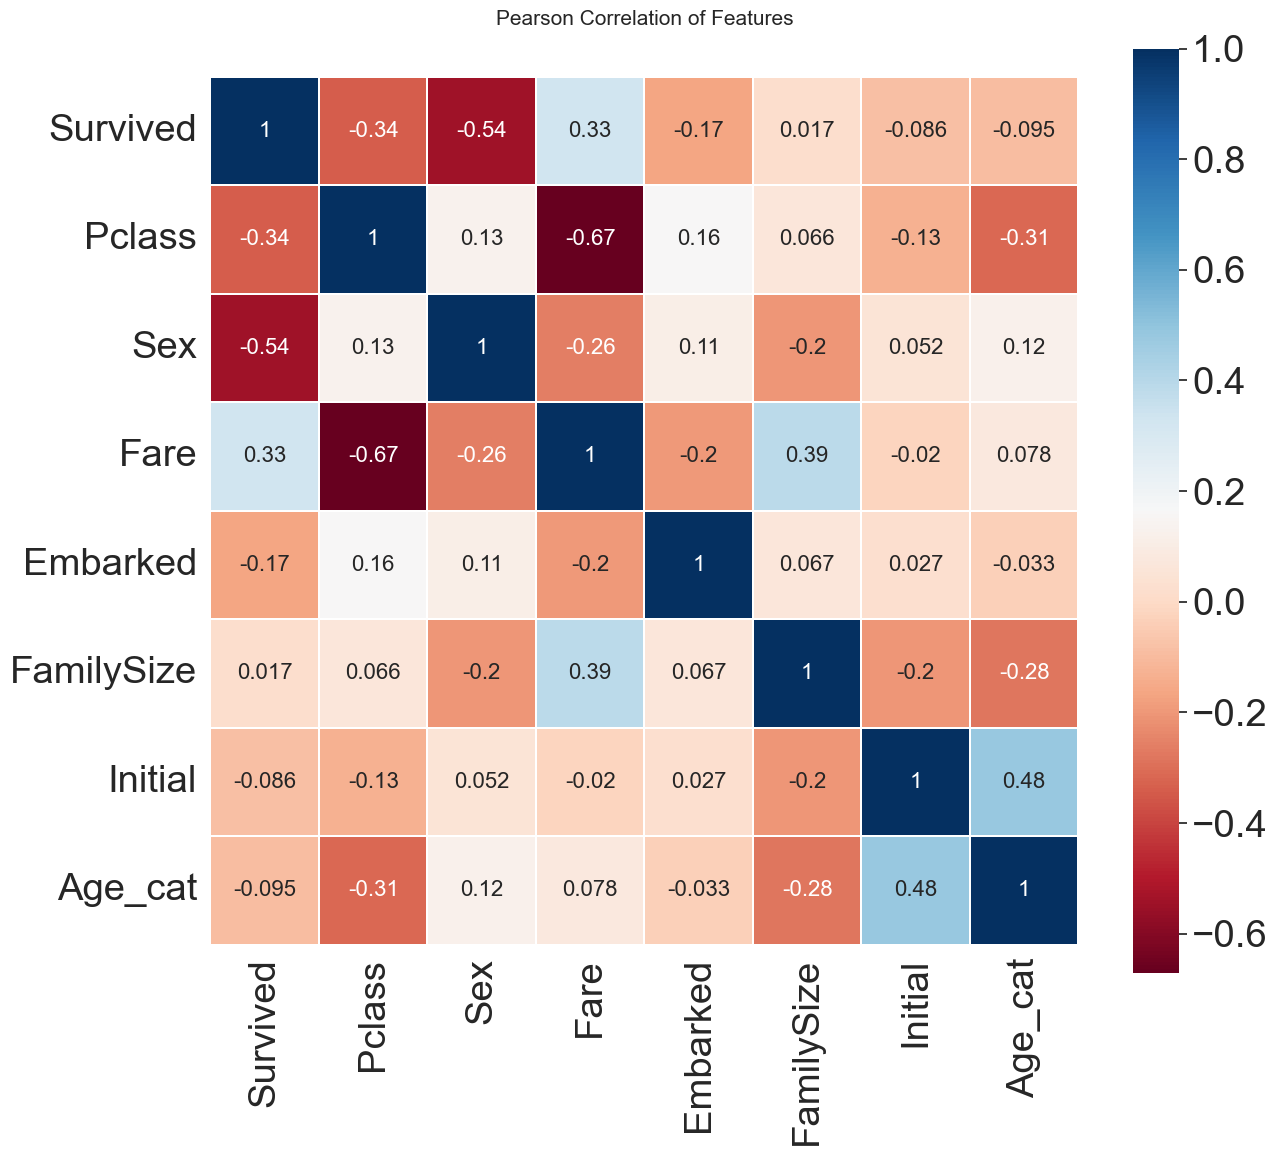

In [61]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize = (14,12))
plt.title('Pearson Correlation of Features', y= 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, 
            square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws={"size" : 16})
del heatmap_data

In [ ]:
# 성별과 생존율의 관계성이 가장 크다.
# 요금과 객실등급 간의 관계성이 있다.


In [62]:
df_train = pd.get_dummies(df_train, columns =['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [63]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,False,False,True,False,False


In [64]:
df_train = pd.get_dummies(df_train, columns = ['Embarked'], prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'], prefix = 'Embarked')

In [65]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace = True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [66]:
df_train = df_train *1
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [67]:
df_test = df_test *1
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [70]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [78]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2018)

In [79]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [80]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction,y_vld)))

총 268명 중 83.21% 정확도로 생존을 맞춤


In [83]:
from pandas import Series
# 특성 중요도
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

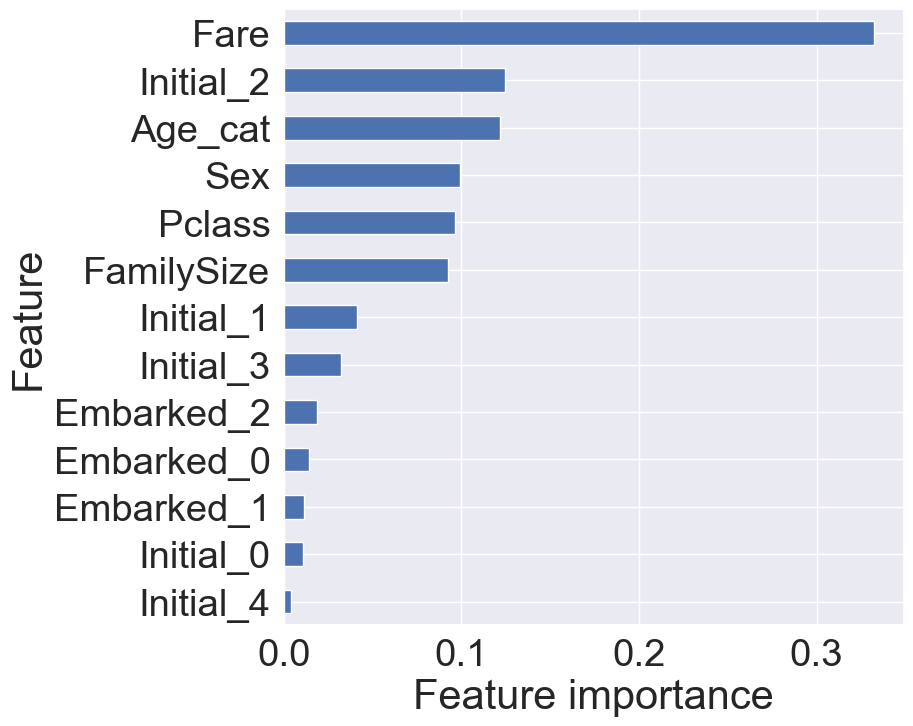

In [84]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# 어떤 특성이 모델의 예측에 얼마나 기여하는지를알 수 있음.
# 요금, Initial_2의 여부 = Mr (30대 남자 -> 가장 사망이 많음), 나이대 순서대로 기여한다.


In [85]:
submission = pd.read_csv('dataset/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [87]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [88]:
submission.to_csv('./my_first_submission.csv',index=False)

In [ ]:
#0.75119 점